<a href="https://colab.research.google.com/github/andrea212023/ML-Kis/blob/main/HW_2_3_Decision_trees_KIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



process_bank_churn

https://github.com/andrea212023/ML-Kis/blob/main/process_bank_churn.py

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from process_bank_churn import preprocess_data, preprocess_new_data, main_process_data

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/'
od.download(dataset_url)
data_dir = './bank-customer-churn-prediction-dlu'
raw_df = pd.read_csv('./bank-customer-churn-prediction-dlu/train.csv')

Skipping, found downloaded files in "./bank-customer-churn-prediction-dlu" (use force=True to force download)


In [ ]:
# Excluded columns
excluded_cols = ['CustomerId', 'CreditScore', 'Tenure', 'HasCrCard', 'EstimatedSalary', 'Surname', 'id']
# Preprocessing
datasets = preprocess_data(raw_df, excluded_cols)

In [ ]:
print("train_X shape:", datasets['train_X'].shape)
print("train_y shape:", datasets['train_y'].shape)
print("val_X shape:", datasets['val_X'].shape)
print("val_y shape:", datasets['val_y'].shape)
print("Input columns:", datasets['input_cols'])
print("Scaler:", datasets['scaler'])
print("Encoder:", datasets['encoder'])

# Display preprocessed data
print(datasets['train_X'].head())

train_X shape: (12000, 9)
train_y shape: (12000,)
val_X shape: (3000, 9)
val_y shape: (3000,)
Input columns: ['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
Scaler: StandardScaler()
Encoder: OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        Age   Balance  NumOfProducts  IsActiveMember  Geography_France  \
0 -0.944682  1.475464      -1.108193        1.016977               1.0   
1  0.161227  2.254434      -1.108193       -0.983306               1.0   
2 -0.330288  1.223831       0.769304       -0.983306               0.0   
3  2.495924 -0.717950       0.769304        1.016977               0.0   
4 -2.050591 -0.717950       0.769304        1.016977               1.0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                0.0              0.0            0.0          1.0  
1                0.0              0.0            1.0          0.0  
2 

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [ ]:
# Extract datasets
X_train = datasets['train_X']
y_train = datasets['train_y']
X_val = datasets['val_X']
y_val = datasets['val_y']

# Train DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_train_pred_proba = clf.predict_proba(X_train)[:, 1]
y_val_pred_proba = clf.predict_proba(X_val)[:, 1]

# Compute ROC AUC
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)

# Compute depth of DecisionTreeClassifier
tree_depth = clf.get_depth()

In [ ]:
# Print results
print("ROC AUC Train:", roc_auc_train)
print("ROC AUC Validation:", roc_auc_val)
print("Tree Depth:", tree_depth)

ROC AUC Train: 0.9893268332533869
ROC AUC Validation: 0.8126582756018932
Tree Depth: 26


In [ ]:
val_targets = pd.Series(y_val)
relative_frequencies = val_targets.value_counts(normalize=True)
print(f"Relative frequencies in the validation set:\n{relative_frequencies}")

Relative frequencies in the validation set:
Exited
0.0    0.796667
1.0    0.203333
Name: proportion, dtype: float64


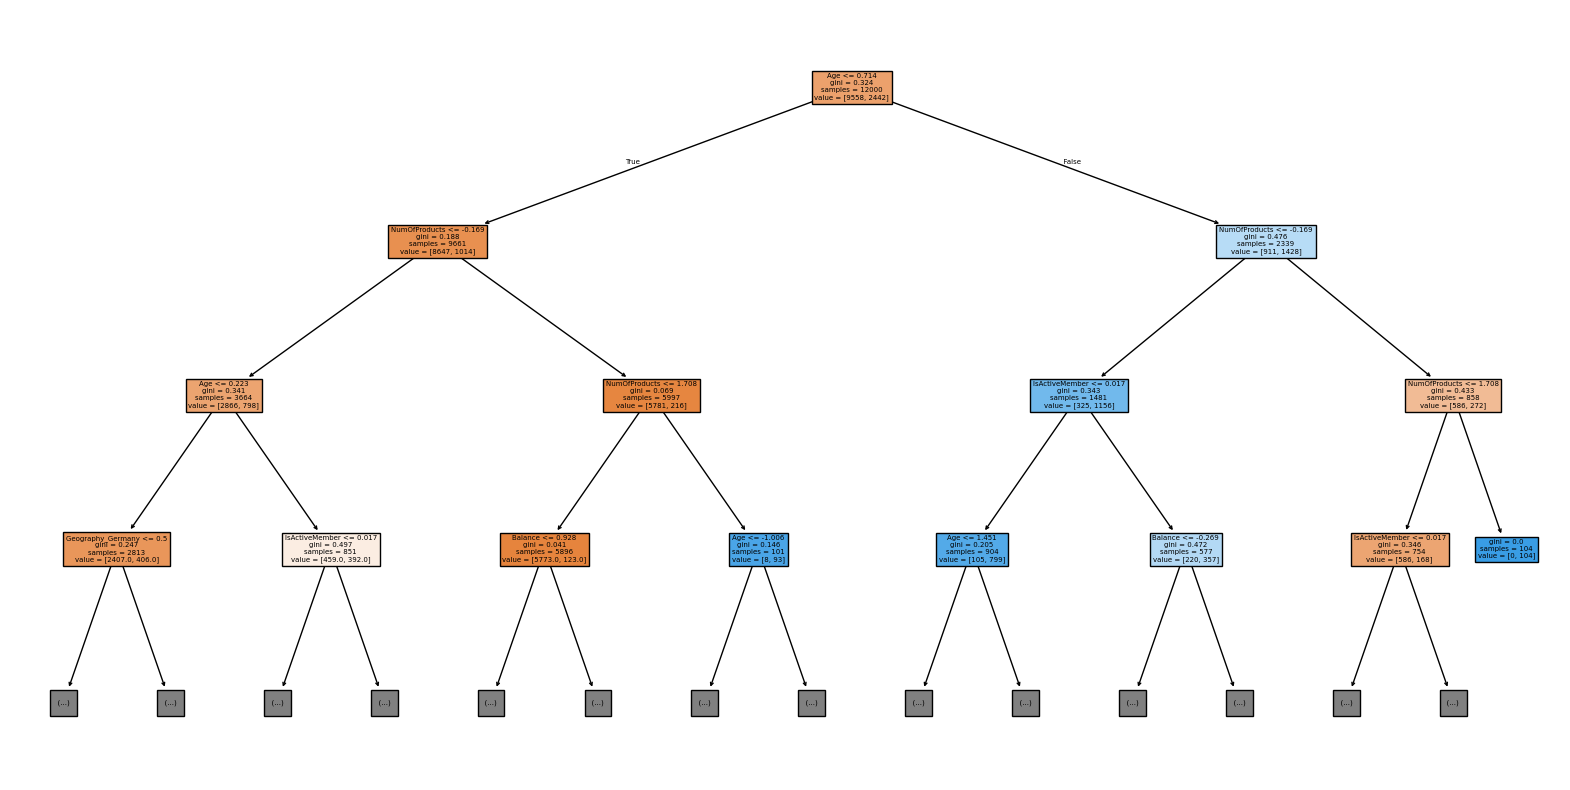

In [ ]:
# Plot DesicionTreeClassifier to the depth of 3
plt.figure(figsize=(20, 10))
plot_tree(clf, max_depth=3, feature_names=X_train.columns, filled=True)
plt.show()

In [ ]:
# Define most important features
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

top_10_features = importance_df.head(10)
top_10_features

,feature,importance
0,Age,0.449677
1,Balance,0.240440
2,NumOfProducts,0.206620
3,IsActiveMember,0.040783
5,Geography_Germany,0.018757
8,Gender_Male,0.014190
7,Gender_Female,0.013476
6,Geography_Spain,0.010192
4,Geography_France,0.005866


In [ ]:
import altair as alt

chart = alt.Chart(top_10_features).mark_bar().encode(
    x=alt.X('feature', sort='-y'),  # Sort features by importance in descending order
    y='importance').properties(title='Top 10 Feature Importance')

chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Observations:**
1. A high ROC AUC for the training set and a significantly lower ROC AUC for the validation set indicate that the model is overfitted. This means the model fits the training data well but does not generalize well to new data.
2. The tree depth is 27, suggesting a complex model with signs of overfitting, as indicated by the ROC AUC value.
3. At depth level 2, the most influential features are NumOfProducts, Age, and IsActiveMember. At depth level 3, the most influential features are Geography_Germany, Balance, Age, and IsActiveMember.
4. From top-10 features, Age, Balance, NumOfProducts, and IsActiveMember stand out as the most significant.

**Conclusion:**

The model appears to be overfitted, as indicated by a high ROC AUC for the training set and a significantly lower ROC AUC for the validation set, meaning it does not generalize well to new data. The complexity of the model is further highlighted by its tree depth of 27, which contributes to the overfitting. Key influential features at different depth levels and overall include NumOfProducts, Age, Balance, and IsActiveMember, with specific importance at various levels also attributed to Geography_Germany.


**Recommendations:**

1. Simplify the Model

Prune the Tree: Reduce the complexity by pruning the decision tree to avoid overfitting. Limit the maximum depth or the minimum samples required to split a node.

Regularization: Implement regularization techniques to penalize overly complex models.

2. Feature Engineering

Feature Selection: Re-evaluate the importance of features. Remove less influential features to simplify the model.

Feature Creation: Create new features that might capture the underlying patterns better.

3. Cross-Validation

K-Fold Cross-Validation: Use cross-validation techniques to ensure the model’s performance is consistent across different subsets of data.


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [ ]:
def evaluate_model(max_leaf_nodes, max_depth):
    clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=max_leaf_nodes, max_depth=max_depth)
    clf.fit(X_train, y_train)

    y_train_pred_proba = clf.predict_proba(X_train)[:, 1]
    y_val_pred_proba = clf.predict_proba(X_val)[:, 1]

    roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
    roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)

    return roc_auc_train, roc_auc_val, clf

In [ ]:
max_leaf_nodes_list = [10, 20, 30, 40, 50]
max_depth_list = [3, 5, 7, 9, 11]

best_roc_auc_val = 0
best_params = (None, None)
results = []

# Ітерація по різних значеннях та оцінка моделі
for max_leaf_nodes in max_leaf_nodes_list:
    for max_depth in max_depth_list:
        roc_auc_train, roc_auc_val, clf = evaluate_model(max_leaf_nodes, max_depth)
        results.append((max_leaf_nodes, max_depth, roc_auc_train, roc_auc_val))
        if roc_auc_val > best_roc_auc_val:
            best_roc_auc_val = roc_auc_val
            best_params = (max_leaf_nodes, max_depth)

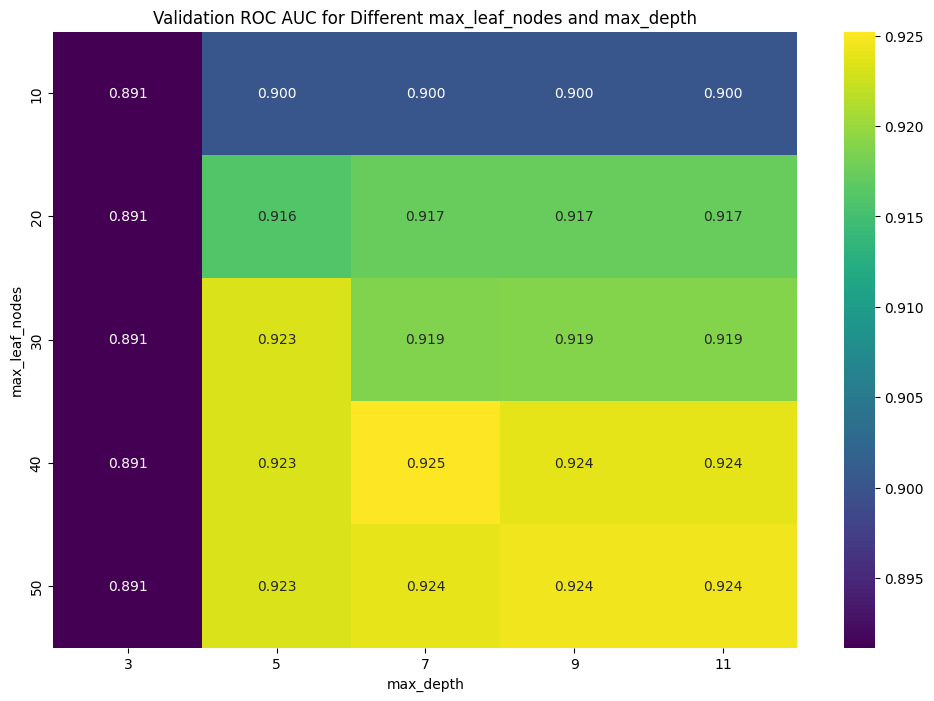

Best value of max_leaf_nodes: 40
Best value of max_depth: 7
Best value of ROC AUC for validation set: 0.9252253240963029
Best tree depth: 7
Best ROC AUC for train dataset: 0.929678137305256
Best ROC AUC for validation dataset: 0.9252253240963029


In [ ]:
# Plot results
results_df = pd.DataFrame(results, columns=['max_leaf_nodes', 'max_depth', 'roc_auc_train', 'roc_auc_val'])
pivot_table = results_df.pivot_table(values='roc_auc_val', index='max_leaf_nodes', columns='max_depth')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis")
plt.title('Validation ROC AUC for Different max_leaf_nodes and max_depth')
plt.show()

# Plot best values
print(f"Best value of max_leaf_nodes: {best_params[0]}")
print(f"Best value of max_depth: {best_params[1]}")
print(f"Best value of ROC AUC for validation set: {best_roc_auc_val}")

# Train the best model
best_clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=best_params[0], max_depth=best_params[1])
best_clf.fit(X_train, y_train)
best_tree_depth = best_clf.get_depth()

print(f"Best tree depth: {best_tree_depth}")

# ROC AUC for train and validation datasets
best_roc_auc_train = roc_auc_score(y_train, best_clf.predict_proba(X_train)[:, 1])
best_roc_auc_val = roc_auc_score(y_val, best_clf.predict_proba(X_val)[:, 1])

print(f"Best ROC AUC for train dataset: {best_roc_auc_train}")
print(f"Best ROC AUC for validation dataset: {best_roc_auc_val}")

**Conclusions:**

1. The ROC AUC value for the validation set is very close to the ROC AUC value for the training set, indicating that the model generalizes well to new data and is not overfitted.
2. As a result of experimenting with different values for the max_leaf_nodes and max_depth parameters in the DecisionTreeClassifier model, optimal parameters were found that yield the best results on the validation set.
3. During the experiments, various values for max_leaf_nodes and max_depth were tested. The best results were obtained with max_leaf_nodes = 40 and max_depth = 7.
4. The depth of the best tree is 7, which is significantly lower compared to the initial tree depth of 27. This also suggests that the new model is simpler and better at generalizing.
5. Thus, the grid search method helped find the parameters for the DecisionTreeClassifier model that provide the best generalization on the validation set. Optimizing the parameters significantly reduced the tree depth and increased the ROC AUC value on the validation set to 0.9252, which is an excellent result.


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [ ]:
# Iteration range 1-21
max_depth_values = range(1, 21)
train_auc = []
val_auc = []
train_errors = []
val_errors = []

for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    clf.fit(X_train, y_train)

    y_train_pred_proba = clf.predict_proba(X_train)[:, 1]
    y_val_pred_proba = clf.predict_proba(X_val)[:, 1]

    roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
    roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)

    train_auc.append(roc_auc_train)
    val_auc.append(roc_auc_val)

    train_error = log_loss(y_train, y_train_pred_proba)
    val_error = log_loss(y_val, y_val_pred_proba)

    train_errors.append(train_error)
    val_errors.append(val_error)

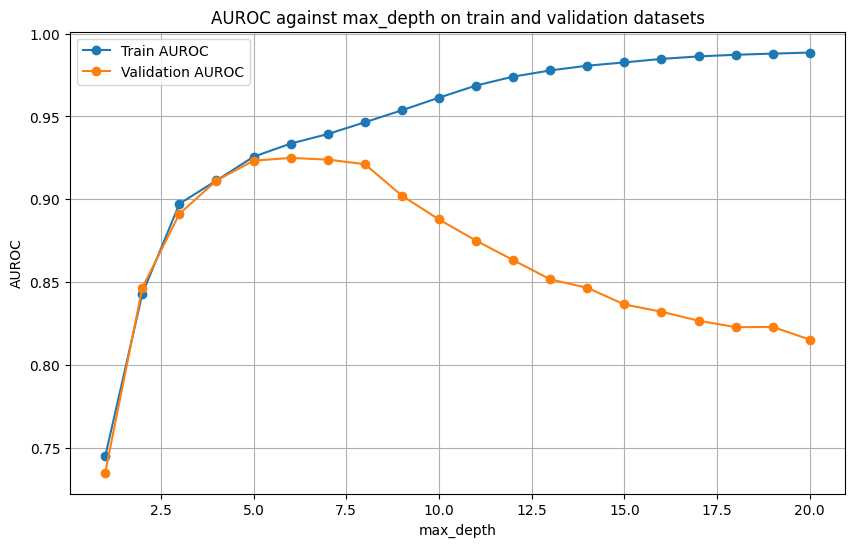

In [ ]:
# Plot AUROC against max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_auc, label='Train AUROC', marker='o')
plt.plot(max_depth_values, val_auc, label='Validation AUROC', marker='o')
plt.xlabel('max_depth')
plt.ylabel('AUROC')
plt.title('AUROC against max_depth on train and validation datasets')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create errors DataFrame
errors_df = pd.DataFrame({
    'Max Depth': max_depth_values,
    'Training Error': train_errors,
    'Validation Error': val_errors
})

# Print DataFrame
errors_df.style.background_gradient(subset='Validation Error', cmap='coolwarm')

,Max Depth,Training Error,Validation Error
0,1,0.400686,0.414233
1,2,0.347127,0.345845
2,3,0.290177,0.307230
3,4,0.274767,0.290782
4,5,0.256254,0.289340
5,6,0.243513,0.339806
6,7,0.232227,0.402828
7,8,0.219101,0.570823
8,9,0.202821,0.937905
9,10,0.184935,1.237863


**Observations and conclusion:**

1. The graph shows that the AUROC value for the validation set peaks at a max_depth of 6-7. After this point, the AUROC value for the validation set begins to decrease, indicating the onset of overfitting.

2. Using max_depth values greater than 7 leads to overfitting, as evidenced by the declining AUROC for the validation set. These values should be avoided to ensure good model generalization.


**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [ ]:
# Best iterations from previous tasks
depths = [6, 7]
results = {}

for depth in depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    roc_auc_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
    results[depth] = {'model': clf, 'roc_auc_train': roc_auc_train}

# Best model choice
best_depth = max(results, key=lambda x: results[x]['roc_auc_train'])
best_clf = results[best_depth]['model']

print(f"Best max_depth: {best_depth}")

Best max_depth: 7


In [ ]:
# Train best model with depth 7
optimal_max_depth = 7
best_clf = DecisionTreeClassifier(random_state=42, max_depth=optimal_max_depth)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
test_df = pd.read_csv('./bank-customer-churn-prediction-dlu/test.csv')
test_df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [ ]:
# Exclusion of some columns
input_cols = datasets['input_cols']
scaler = datasets['scaler']
encoder = datasets['encoder']

# Data preprocessing
X_test = preprocess_new_data(test_df, input_cols, scaler, encoder, excluded_cols)

# Use best classifier for prediction
best_clf = DecisionTreeClassifier(random_state=42, max_depth=7)
best_clf.fit(datasets['train_X'], datasets['train_y'])
predictions = best_clf.predict(X_test)

In [ ]:
# Predict on train and validation datasets
y_train_pred_proba = best_clf.predict_proba(datasets['train_X'])[:, 1]
y_val_pred_proba = best_clf.predict_proba(datasets['val_X'])[:, 1]

# AUROC for train and validation datasets
roc_auc_train = roc_auc_score(datasets['train_y'], y_train_pred_proba)
roc_auc_val = roc_auc_score(datasets['val_y'], y_val_pred_proba)

# Predict on test data
predictions = best_clf.predict(X_test)
predictions_proba = best_clf.predict_proba(X_test)[:, 1]

# Print AUROC
print(f"AUROC for train dataset: {roc_auc_train}")
print(f"AUROC for validation dataset: {roc_auc_val}")

AUROC for train dataset: 0.9393145713767181
AUROC for validation dataset: 0.9238754372727898


In [ ]:
# Load the sample submission file
submission_df =  pd.read_csv('./bank-customer-churn-prediction-dlu/sample_submission.csv')

# Ensure the 'Exited' column is filled with predictions
submission_df['Exited'] = predictions

# Save the updated DataFrame to a new CSV file
submission_df.to_csv('drive/MyDrive/Colab Notebooks/data//submission_tress.csv', index=False)

In [ ]:
submission_df.head()

,id,Exited
0,15000,0.0
1,15001,0.0
2,15002,0.0
3,15003,1.0
4,15004,0.0


**Conclusion:**

According to the results, the 4th-order polynomial logistic regression model shows better performance than the decision tree. This could be because it is better suited for this dataset and classification problem.

**Recommendations:**

1. Finding optimal hyperparameters for the decision tree using GridSearchCV.

2. Addressing class imbalance: Considering methods to balance the data.


In [66]:
# Implement GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(datasets['train_X'], datasets['train_y'])

# Best model
best_clf = grid_search.best_estimator_
print (best_clf)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)


In [67]:
# Predict on train and validation datasets
y_train_pred_proba = best_clf.predict_proba(datasets['train_X'])[:, 1]
y_val_pred_proba = best_clf.predict_proba(datasets['val_X'])[:, 1]

# AUROC for train and validation datasets
roc_auc_train = roc_auc_score(datasets['train_y'], y_train_pred_proba)
roc_auc_val = roc_auc_score(datasets['val_y'], y_val_pred_proba)

# Predict on test data
predictions_proba = best_clf.predict_proba(X_test)[:, 1]

# Print AUROC
print(f"AUROC for train dataset: {roc_auc_train}")
print(f"AUROC for validation dataser: {roc_auc_val}")

AUROC for train dataset: 0.939047033679802
AUROC for validation dataser: 0.9239652925440702


In [68]:
# Implement SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(datasets['train_X'], datasets['train_y'])

# Train classifier on resampled data
best_clf.fit(X_resampled, y_resampled)
print(best_clf.fit)

<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)>


In [69]:
# Predict on train and validation datasets
y_train_pred_proba = best_clf.predict_proba(datasets['train_X'])[:, 1]
y_val_pred_proba = best_clf.predict_proba(datasets['val_X'])[:, 1]

# AUROC for train and validation datasets
roc_auc_train = roc_auc_score(datasets['train_y'], y_train_pred_proba)
roc_auc_val = roc_auc_score(datasets['val_y'], y_val_pred_proba)

# Predict on test data
predictions_proba = best_clf.predict_proba(X_test)[:, 1]

# Print AUROC
print(f"AUROC for train dataset: {roc_auc_train}")
print(f"AUROC for validation dataset: {roc_auc_val}")

AUROC for train dataset: 0.9372581149888117
AUROC for validation dataset: 0.9201611907538241


In [70]:
# Ensure the 'Exited' column is filled with predictions
submission_df['Exited'] = predictions_proba

# Save the updated DataFrame to a new CSV file
submission_df.to_csv('drive/MyDrive/Colab Notebooks/data//submission_tres_balance.csv', index=False)

**Performance Analysis:**

**First Method: Original Preprocessing**

Train AUROC: 0.9393

Validation AUROC: 0.9238

**Observations:**

1. High AUROC on both train and validation datasets suggests that the model is performing well without tuning.
2. Decision Tree models can easily overfit, but here the gap between train and validation AUROC is small, suggesting limited overfitting.
However, this method may be suboptimal compared to GridSearch-tuned models.

**Second Method: GridSearchCV**

Train AUROC: 0.9390

Validation AUROC: 0.9239

**Observations:**

1. Marginally better validation performance than the first method (0.9239 vs. 0.9238).
2. GridSearchCV has likely optimized hyperparameters like max_depth, min_samples_split, etc., resulting in a model that generalizes slightly better.
3. The small improvement indicates that the original preprocessing already worked well, and the additional optimization might have only fine-tuned the performance.

**Third Method: SMOTE**

Train AUROC: 0.9373

Validation AUROC: 0.9201

**Observations:**

1. Slightly lower train and validation AUROC compared to the first two methods.
2. Using SMOTE addresses class imbalance, which can improve minority class performance. However, it may sometimes introduce noise or redundant synthetic data, slightly lowering overall performance.
3. The lower validation AUROC suggests that the oversampling might not have been as effective for this dataset, especially if the class imbalance wasn’t severe to begin with.

**Conclusions:**

**First Method: Decent Baseline**

The original Decision Tree Classifier serves as a strong baseline with competitive performance (Train: 0.9393, Val: 0.9238).
However, it might not fully utilize the dataset's potential without hyperparameter tuning.

**Second Method: Best Overall Performance**

The GridSearchCV-tuned Decision Tree shows marginal improvement over the baseline, indicating that hyperparameter tuning helped refine the model.
The slightly higher validation AUROC (0.9239) suggests better generalization.
**This method is the most suitable for deployment**.

**Third Method: Mixed Results with SMOTE**

While SMOTE is beneficial for addressing class imbalance, the lower validation AUROC (0.9201) indicates it didn’t outperform the other methods.
This could suggest that the dataset's original imbalance wasn’t critical enough to warrant oversampling, or the oversampling introduced unnecessary synthetic data.